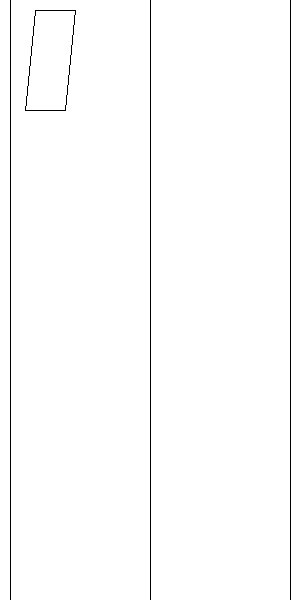

In [67]:
from PIL import Image, ImageDraw, ImageFont

# Create a new blank image (width, height), color: white
image = Image.new("RGB", (300, 600), color="white")

# Create an ImageDraw object to draw on the image
draw = ImageDraw.Draw(image)

# draw a horizontal line straight through the middle of the image
draw.line((150, 0, 150, 600), fill="black")

draw.line((10, 0, 10, 600), fill="black")
draw.line((290, 0, 290, 600), fill="black")

# Car
# draw.rectangle((30, 0, 30 + 40, 0 + 100), fill="black")

# # Jeep
# draw.rectangle((30, 105, 30 + 50, 105 + 120), fill="black")

# # Truck
# draw.rectangle((30, 240, 30 + 60, 240 + 180), fill="black")
# draw a skwed rectangle
draw.polygon(
    [
        (30 + 5, 10),
        (30 + 40 + 5, 10),
        (30 + 40 - 5, 10 + 100),
        (30 - 5, 10 + 100),
    ],
    fill=None,
    outline="black",
)


display(image)

Lets define vehicles

1. Car around 40px across and 100px length
2. Small Truck or Jeep, 50px across and 120px length
3. Large Truck or Lorry, 50px across and 180px length


So there will be two parts to the streets, the left or the right. Left will have x values less than 240px and Right will have x values greater than 360 px, additionally curbs must be drawn at the corners of each side to detect edges and detect parking spaces


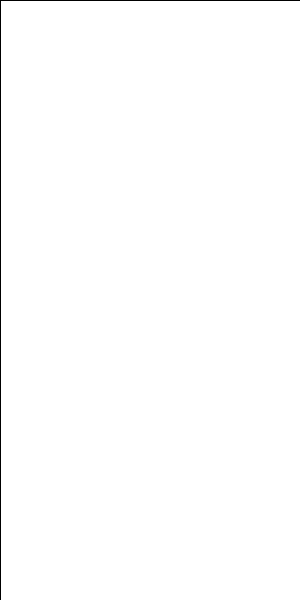

In [24]:
from PIL import Image, ImageDraw, ImageFont


VEHICLES = {"car": (40, 100), "jeep": (50, 120), "truck": (50, 180)}


def createStreet(streetWidth, streetHeight, traffic, typesOfCars):
    image = Image.new("RGB", (streetWidth, streetHeight), color="white")

    draw = ImageDraw.Draw(image)

    draw.line((0, 0, streetWidth, 0), fill="black")
    draw.line((0, 0, 0, streetHeight), fill="black")
    draw.line((streetWidth, 0, streetWidth, streetHeight), fill="black")
    draw.line((0, streetHeight, streetWidth, streetHeight), fill="black")

    draw.line((0, 0, 0, streetHeight), fill="black")
    draw.line((streetWidth, 0, streetWidth, streetHeight), fill="black")

    return image


display(createStreet(300, 600, 0.5, VEHICLES))

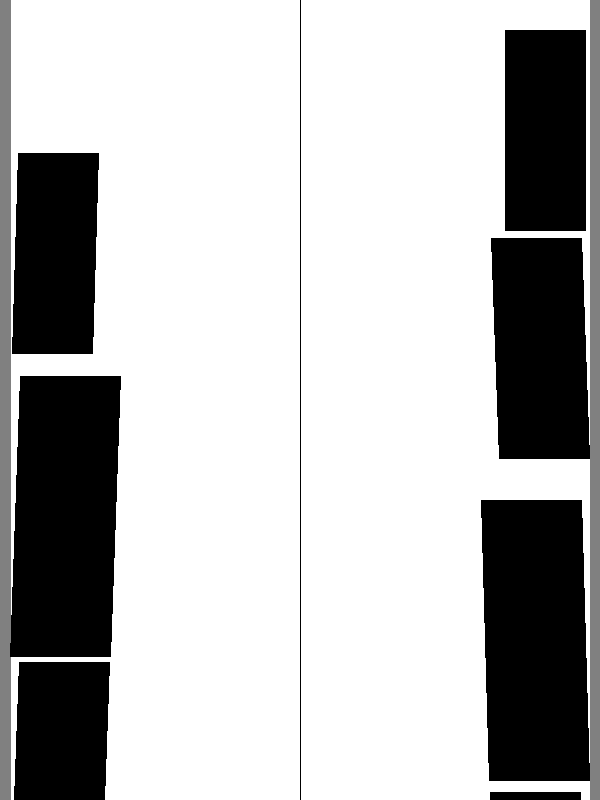

In [95]:
from PIL import Image, ImageDraw, ImageFont
import random

PROTUDE = 10
CAR_LENGTH = 100
VEHICLES = {"car": (80, 200), "jeep": (90, 220), "truck": (100, 280)}


def createCurbs(draw, streetWidth, streetHeight, curbWidth, curbColor="gray"):
    """
    Function to draw the curbs on both sides of the street.

    Parameters:
    - draw: The ImageDraw object to draw on the image.
    - streetWidth: Total width of the street.
    - streetHeight: Total height of the street.
    - curbWidth: Width of each curb.
    - curbColor: Color of the curb (default is gray).
    """
    # Draw left curb
    draw.rectangle((0, 0, curbWidth, streetHeight), fill=curbColor)

    # Draw right curb
    draw.rectangle((streetWidth - curbWidth, 0, streetWidth, streetHeight), fill=curbColor)

def fillLane(image, draw, lane, traffic, vehicles):
    i = 30
    while i < image.height:
        psNoise = random.randint(0, 40)
        if traffic > random.random():
            vehicle = random.choice(list(vehicles.keys()))
            vw, vh = vehicles[vehicle][0], vehicles[vehicle][1]
            paNoise = random.randint(0, 5)
            if lane == "left":

                draw.polygon(
                    [
                        (PROTUDE + 5 + paNoise, i),
                        (PROTUDE + 5 + paNoise + vw, i),
                        (PROTUDE + 5 - paNoise + vw, i + vh),
                        (PROTUDE + 5 - paNoise, i + vh),
                    ],
                    fill="black",
                )
            else:
                draw.polygon(
                    [
                        (image.width - (PROTUDE + 5 + vw + paNoise), i),
                        (image.width - (PROTUDE + 5 + paNoise), i),
                        (image.width - (PROTUDE + 5 - paNoise), i + vh),
                        (image.width - (PROTUDE + 5 + vw - paNoise), i + vh),
                    ],
                    fill="black",
                )
                

            i += vh + 5 + psNoise
        else:
            i += CAR_LENGTH + psNoise


def createStreet(streetWidth, streetHeight, traffic, vehicles):
    image = Image.new("RGB", (streetWidth, streetHeight), color="white")

    draw = ImageDraw.Draw(image)

    # Draw the curbs
    createCurbs(draw, streetWidth, streetHeight, PROTUDE)

    # Draw the middle lane marking
    draw.line((streetWidth // 2, 0, streetWidth // 2, streetHeight), fill="black")

    # Fill left lane
    fillLane(image, draw, "left", traffic, vehicles)
    # Fill right lane
    fillLane(image, draw, "right", traffic, vehicles)

    return image


street = createStreet(600, 800, 0.9, VEHICLES)

street

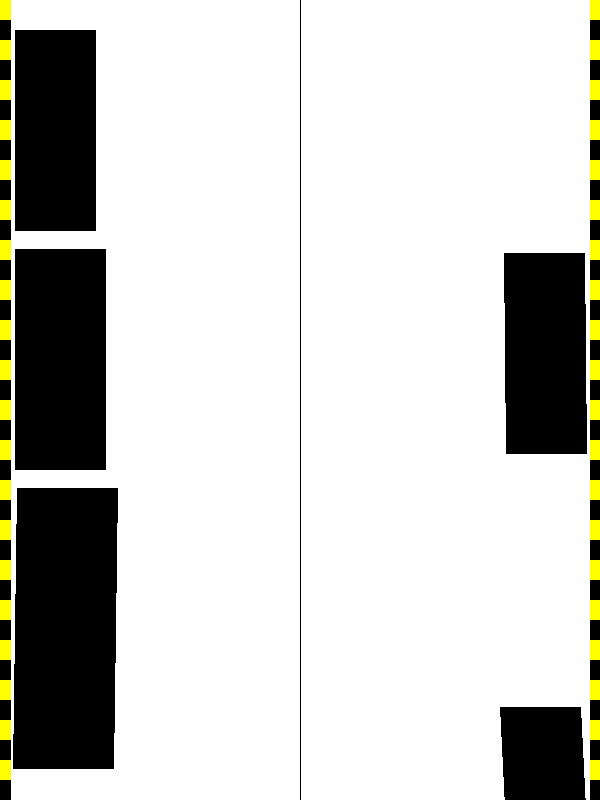

In [103]:
from PIL import Image, ImageDraw

# Constants for the curb
PROTRUDE = 10  # Width of the curb
CURB_SEGMENT_HEIGHT = 20  # Height of each yellow/black curb segment
CAR_LENGTH = 100
VEHICLES = {"car": (80, 200), "jeep": (90, 220), "truck": (100, 280)}

def createCurbs(draw, streetWidth, streetHeight, curbWidth, segmentHeight, colors=("yellow", "black")):
    current_y = 0
    color_index = 0

    # Draw alternating segments on the left curb
    while current_y < streetHeight:
        draw.rectangle(
            (0, current_y, curbWidth, min(current_y + segmentHeight, streetHeight)),
            fill=colors[color_index]
        )
        color_index = (color_index + 1) % 2  # Alternate between colors
        current_y += segmentHeight

    # Reset variables for the right curb
    current_y = 0
    color_index = 0

    # Draw alternating segments on the right curb
    while current_y < streetHeight:
        draw.rectangle(
            (streetWidth - curbWidth, current_y, streetWidth, min(current_y + segmentHeight, streetHeight)),
            fill=colors[color_index]
        )
        color_index = (color_index + 1) % 2  # Alternate between colors
        current_y += segmentHeight

def fillLane(image, draw, lane, traffic, vehicles):
    current_y = 30
    while current_y < image.height:
        psNoise = random.randint(0, 40)
        if traffic > random.random():
            vehicle = random.choice(list(vehicles.keys()))
            vw, vh = vehicles[vehicle][0], vehicles[vehicle][1]
            paNoise = random.randint(0, 5)
            if lane == "left":

                draw.polygon(
                    [
                        (PROTUDE + 5 + paNoise, current_y),
                        (PROTUDE + 5 + paNoise + vw, current_y),
                        (PROTUDE + 5 - paNoise + vw, current_y + vh),
                        (PROTUDE + 5 - paNoise, current_y + vh),
                    ],
                    fill="black",
                )
            else:
                draw.polygon(
                    [
                        (image.width - (PROTUDE + 5 + vw + paNoise), current_y),
                        (image.width - (PROTUDE + 5 + paNoise), current_y),
                        (image.width - (PROTUDE + 5 - paNoise), current_y + vh),
                        (image.width - (PROTUDE + 5 + vw - paNoise), current_y + vh),
                    ],
                    fill="black",
                )
                

            current_y += vh + 5 + psNoise
        else:
            current_y += CAR_LENGTH + psNoise

def createStreet(streetWidth, streetHeight, traffic, vehicles):
    image = Image.new("RGB", (streetWidth, streetHeight), color="white")
    draw = ImageDraw.Draw(image)

    # Draw the curbs with alternating yellow and black
    createCurbs(draw, streetWidth, streetHeight, PROTRUDE, CURB_SEGMENT_HEIGHT)

    # Draw the middle lane marking
    draw.line((streetWidth // 2, 0, streetWidth // 2, streetHeight), fill="black")

    # Fill left lane
    fillLane(image, draw, "left", traffic, vehicles)
    # Fill right lane
    fillLane(image, draw, "right", traffic, vehicles)

    return image

# Example usage
streetWidth = 600
streetHeight = 800

street_image = createStreet(streetWidth, streetHeight, 0.7, VEHICLES)
street_image
